# **Analysis of real estate data in Saudi Arabia during the year 2022-2023:**


****
## **First: Data**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

In [55]:
path = pd.read_excel('العقارات.xlsx')
data_23_2= pd.DataFrame(path)

data_23_2.rename(columns={'المنطقة': 'Region', 'المدينة': 'City','المدينة / الحي':'City/Neighborhood','الرقم المرجعي للصفقة':'Reference_Number','تاريخ الصفقة ميلادي':'Date','تصنيف العقار':'Property_classification','نوع العقار':'Property_type', 'عدد العقارات':'Number_of_properties','السعر':'Price','المساحة':'Space'}, inplace=True)
data_23_2.drop('تاريخ الصفقة هجري',inplace=True, axis=1)
data_23_2['Price_per_square-meter'] = data_23_2['Price'] / data_23_2['Space']
data_23_2

,Region,City,City/Neighborhood,Reference_Number,Date,Property_classification,Property_type,Number_of_properties,Price,Space,Price_per_square-meter
0,منطقة الرياض,الرياض,الرياض/السويدى,19683341,2023-04-01,تجاري,قطعة أرض,2,2500000.0,1000.00,2500.000000
1,منطقة الرياض,الرياض,الرياض/المهدية,19682474,2023-04-01,سكني,قطعة أرض,1,1400000.0,270.00,5185.185185
2,منطقة مكة المكرمه,الطائف,الطائف/ الحلقة,19683061,2023-04-01,سكني,قطعة أرض,1,1200000.0,1096.12,1094.770646
3,منطقة الرياض,الرياض,الرياض/الزهرة,19683218,2023-04-01,تجاري,قطعة أرض,1,1000000.0,625.00,1600.000000
4,منطقة الشرقية,قرية العليا,قرية العليا/أخرى,19620608,2023-04-01,سكني,قطعة أرض,1,20000.0,920.00,21.739130
...,...,...,...,...,...,...,...,...,...,...,...
38806,منطقة القصيم,بريده,بريده/ الشقة,20288989,2023-06-30,سكني,قطعة أرض,1,102794.4,285.54,360.000000
38807,منطقة القصيم,بريده,بريده/ الشقة,20288991,2023-06-30,تجاري,قطعة أرض,1,136800.0,360.00,380.000000
38808,منطقة القصيم,بريده,بريده/ الشقة,20288984,2023-06-30,تجاري,قطعة أرض,1,109537.2,304.27,360.000000
38809,منطقة القصيم,بريده,بريده/ الشقة,20288910,2023-06-30,تجاري,قطعة أرض,1,119880.0,324.00,370.000000


In [56]:
path = pd.read_excel('العقارات_2023_الربع الاول.xlsx')
data_23_1 = pd.DataFrame(path)
data_23_1.rename(columns={'المنطقة': 'Region', 'المدينة': 'City','الحي':'City/Neighborhood','رقم مرجعي':'Reference_Number','التاريخ':'Date','تصنيف العقار':'Property_classification','نوع العقار':'Property_type', 'عدد العقارات':'Number_of_properties','السعر بالريال السعودي':'Price', 'المساحة ':'Space','سعر المتر المربع':'Price_per_square-meter'}, inplace=True)
data_23_1.drop(columns=['رقم القطعة','المخطط'],inplace=True, axis=1)
data_23_1

,Reference_Number,Region,City,City/Neighborhood,Date,Property_classification,Property_type,Number_of_properties,Price,Space,Price_per_square-meter
0,18923186,منطقة الرياض,الافلاج,حي/أخرى,2023-01-01,سكني,قطعة أرض,1,32000,630.0,50.7936
1,18920819,منطقة الرياض,الافلاج,حي/الريان,2023-01-01,سكني,قطعة أرض,1,60000,690.0,86.9565
2,18923523,منطقة الرياض,الخرج,حي/827 حى هجرة الصاع,2023-01-01,سكني,قطعة أرض,1,20000,630.0,31.7460
3,18909006,منطقة الرياض,الخرج,حي/الاندلس,2023-01-01,سكني,قطعة أرض,1,140000,333.0,420.4204
4,18857540,منطقة الرياض,الخرج,حي/الخالديه,2023-01-01,سكني,قطعة أرض,1,50000,380.0,131.5789
...,...,...,...,...,...,...,...,...,...,...,...
44086,19678497,منطقة جازان,جيزان,حي/محليه,2023-03-31,سكني,قطعة أرض,1,900000,500.0,1800.0000
44087,19666544,منطقة نجران,نجران,حي/المفرق,2023-03-31,سكني,قطعة أرض,1,50000,625.0,80.0000
44088,19666048,منطقة نجران,نجران,حي/شمال حى الفهد,2023-03-31,سكني,قطعة أرض,1,300000,400.0,750.0000
44089,19648639,منطقة نجران,يدمه,حي/6/ ن/ ى/ 1419,2023-03-31,سكني,قطعة أرض,1,10000,1600.0,6.2500


In [57]:
path = pd.read_excel('العقارات_2022_من1_الى4.xlsx')
data_22_1 = pd.DataFrame(path)
data_22_1.rename(columns={'المنطقة': 'Region', 'المدينة': 'City','الحي':'City/Neighborhood','رقم مرجعي':'Reference_Number','التاريخ':'Date','تصنيف العقار':'Property_classification','نوع العقار':'Property_type', 'عدد العقارات':'Number_of_properties','السعر بالريال السعودي':'Price', 'المساحة ':'Space','سعر المتر المربع':'Price_per_square-meter'}, inplace=True)
data_22_1.drop(columns=['رقم القطعة','المخطط'],inplace=True, axis=1)
data_22_1

,Reference_Number,Region,City,City/Neighborhood,Date,Property_classification,Property_type,Number_of_properties,Price,Space,Price_per_square-meter
0,16074562,منطقة الرياض,الافلاج,حي/الخالدية,2022-02-01,سكني,قطعة أرض,1,70000,820.53,85.3107
1,16077290,منطقة الرياض,البجاديه,حي/11 بالدخل المحدود غرب البجادية,2022-02-01,سكني,قطعة أرض,1,10000,625.00,16.0000
2,16077316,منطقة الرياض,الخرج,حي/60حى اليرموك مخطط 1009 الجزء الثانى,2022-02-01,سكني,قطعة أرض,1,100000,624.07,160.2384
3,16073025,منطقة الرياض,الخرج,حي/68 حى اليرموك مخطط 1009/ 2,2022-02-01,تجاري,قطعة أرض,1,110000,581.05,189.3124
4,16069867,منطقة الرياض,الخرج,حي/827 حى هجرة الصاع,2022-02-01,سكني,قطعة أرض,1,40000,630.00,63.4920
...,...,...,...,...,...,...,...,...,...,...,...
59841,16723273,منطقة الجوف,سكاكا,حي/هديب الجنوبى,2022-04-14,سكني,قطعة أرض,1,20000,600.00,33.3333
59842,16730845,منطقة الجوف,طبرجل,حي/23/ 7/ 2/ 1431/ س,2022-04-14,سكني,قطعة أرض,1,50000,471.85,105.9658
59843,16730691,منطقة الجوف,طبرجل,حي/23/ 7/ 2/ 1431/ س,2022-04-14,سكني,قطعة أرض,1,50000,507.33,98.5551
59844,16728812,منطقة الجوف,طبرجل,حي/6 / 7 / 2/ 1423/ معدل/ س,2022-04-14,زراعي,قطعة أرض,1,450000,510.00,882.3529


In [6]:
RealEstate_Data = pd.concat([data_23_1, data_23_2, data_22_1])
RealEstate_Data

,Reference_Number,Region,City,City/Neighborhood,Date,Property_classification,Property_type,Number_of_properties,Price,Space,Price_per_square-meter
0,18923186,منطقة الرياض,الافلاج,حي/أخرى,2023-01-01,سكني,قطعة أرض,1,32000.0,630.00,50.7936
1,18920819,منطقة الرياض,الافلاج,حي/الريان,2023-01-01,سكني,قطعة أرض,1,60000.0,690.00,86.9565
2,18923523,منطقة الرياض,الخرج,حي/827 حى هجرة الصاع,2023-01-01,سكني,قطعة أرض,1,20000.0,630.00,31.7460
3,18909006,منطقة الرياض,الخرج,حي/الاندلس,2023-01-01,سكني,قطعة أرض,1,140000.0,333.00,420.4204
4,18857540,منطقة الرياض,الخرج,حي/الخالديه,2023-01-01,سكني,قطعة أرض,1,50000.0,380.00,131.5789
...,...,...,...,...,...,...,...,...,...,...,...
59841,16723273,منطقة الجوف,سكاكا,حي/هديب الجنوبى,2022-04-14,سكني,قطعة أرض,1,20000.0,600.00,33.3333
59842,16730845,منطقة الجوف,طبرجل,حي/23/ 7/ 2/ 1431/ س,2022-04-14,سكني,قطعة أرض,1,50000.0,471.85,105.9658
59843,16730691,منطقة الجوف,طبرجل,حي/23/ 7/ 2/ 1431/ س,2022-04-14,سكني,قطعة أرض,1,50000.0,507.33,98.5551
59844,16728812,منطقة الجوف,طبرجل,حي/6 / 7 / 2/ 1423/ معدل/ س,2022-04-14,زراعي,قطعة أرض,1,450000.0,510.00,882.3529


In [7]:
RealEstate_Data['Region'] = RealEstate_Data['Region'].replace(['منطقة الشرقية','منطقة المدينة المنوره', 'منطقة مكة المكرمة'],['منطقة مكة المكرمه', 'منطقة المدينة المنورة','المنطقة الشرقية'])

In [8]:
#.replace(['حي','/'],['',''])
RealEstate_Data['City/Neighborhood']= RealEstate_Data.loc[:,'City/Neighborhood'].replace('حي/','',regex=True)
RealEstate_Data['City/Neighborhood']= RealEstate_Data.loc[:,'City/Neighborhood'].replace('الرياض/','',regex=True)

In [9]:
#dowloand the new data
RealEstate_Data.to_csv('RealEstate_Data.csv', index=False)

## **Second: Data Verification**

In [3]:
path = pd.read_csv('RealEstate_Data.csv')
RealEstate_Data = pd.DSataFrame(path)

In [4]:
RealEstate_Data

,Reference_Number,Region,City,City/Neighborhood,Date,Property_classification,Property_type,Number_of_properties,Price,Space,Price_per_square-meter
0,18923186,منطقة الرياض,الافلاج,أخرى,2023-01-01,سكني,قطعة أرض,1,32000.0,630.00,50.7936
1,18920819,منطقة الرياض,الافلاج,الريان,2023-01-01,سكني,قطعة أرض,1,60000.0,690.00,86.9565
2,18923523,منطقة الرياض,الخرج,827 حى هجرة الصاع,2023-01-01,سكني,قطعة أرض,1,20000.0,630.00,31.7460
3,18909006,منطقة الرياض,الخرج,الاندلس,2023-01-01,سكني,قطعة أرض,1,140000.0,333.00,420.4204
4,18857540,منطقة الرياض,الخرج,الخالديه,2023-01-01,سكني,قطعة أرض,1,50000.0,380.00,131.5789
...,...,...,...,...,...,...,...,...,...,...,...
142743,16723273,منطقة الجوف,سكاكا,هديب الجنوبى,2022-04-14,سكني,قطعة أرض,1,20000.0,600.00,33.3333
142744,16730845,منطقة الجوف,طبرجل,23/ 7/ 2/ 1431/ س,2022-04-14,سكني,قطعة أرض,1,50000.0,471.85,105.9658
142745,16730691,منطقة الجوف,طبرجل,23/ 7/ 2/ 1431/ س,2022-04-14,سكني,قطعة أرض,1,50000.0,507.33,98.5551
142746,16728812,منطقة الجوف,طبرجل,6 / 7 / 2/ 1423/ معدل/ س,2022-04-14,زراعي,قطعة أرض,1,450000.0,510.00,882.3529


In [11]:
#to make sure no null values
RealEstate_Data.isnull().sum()

Reference_Number           0
Region                     0
City                       0
City/Neighborhood          0
Date                       0
Property_classification    0
Property_type              0
Number_of_properties       0
Price                      0
Space                      0
Price_per_square-meter     0
dtype: int64

In [12]:
#no duplicated rows
RealEstate_Data.duplicated().sum()

0

In [13]:

RealEstate_Data['Region'].value_counts()

منطقة الرياض             49327
المنطقة الشرقية          35675
منطقة القصيم             13626
منطقة مكة المكرمه        13498
منطقة المدينة المنورة     6294
منطقة عسير                6002
منطقة حائل                5625
منطقة جازان               2814
منطقة تبوك                2628
منطقة الجوف               2305
منطقة نجران               2156
منطقة الحدود الشمالية     2044
منطقة الباحة               754
Name: Region, dtype: int64

In [14]:
#how many types
RealEstate_Data['Property_type'].value_counts()

قطعة أرض      118464
شقة            18279
أرض زراعية      4547
بيت              853
فيلا             225
معرض/محل         207
عمارة             57
مرفق              51
مركز تجاري        38
إستراحة           26
قصر                1
Name: Property_type, dtype: int64

In [15]:
#What are the categories
RealEstate_Data["Property_classification"].value_counts()

سكني     110676
تجاري     18610
زراعي     13384
صناعي        78
Name: Property_classification, dtype: int64

In [59]:
RealEstate_Data['Date'] = pd.to_datetime(RealEstate_Data['Date'])
RealEstate_Data['month_year'] = RealEstate_Data['Date'].dt.strftime('%B %Y')

In [60]:
RealEstate_Data

,Reference_Number,Region,City,City/Neighborhood,Date,Property_classification,Property_type,Number_of_properties,Price,Space,Price_per_square-meter,month_year
0,18923186,منطقة الرياض,الافلاج,أخرى,2023-01-01,سكني,قطعة أرض,1,32000.0,630.00,50.7936,January 2023
1,18920819,منطقة الرياض,الافلاج,الريان,2023-01-01,سكني,قطعة أرض,1,60000.0,690.00,86.9565,January 2023
2,18923523,منطقة الرياض,الخرج,827 حى هجرة الصاع,2023-01-01,سكني,قطعة أرض,1,20000.0,630.00,31.7460,January 2023
3,18909006,منطقة الرياض,الخرج,الاندلس,2023-01-01,سكني,قطعة أرض,1,140000.0,333.00,420.4204,January 2023
4,18857540,منطقة الرياض,الخرج,الخالديه,2023-01-01,سكني,قطعة أرض,1,50000.0,380.00,131.5789,January 2023
...,...,...,...,...,...,...,...,...,...,...,...,...
142743,16723273,منطقة الجوف,سكاكا,هديب الجنوبى,2022-04-14,سكني,قطعة أرض,1,20000.0,600.00,33.3333,April 2022
142744,16730845,منطقة الجوف,طبرجل,23/ 7/ 2/ 1431/ س,2022-04-14,سكني,قطعة أرض,1,50000.0,471.85,105.9658,April 2022
142745,16730691,منطقة الجوف,طبرجل,23/ 7/ 2/ 1431/ س,2022-04-14,سكني,قطعة أرض,1,50000.0,507.33,98.5551,April 2022
142746,16728812,منطقة الجوف,طبرجل,6 / 7 / 2/ 1423/ معدل/ س,2022-04-14,زراعي,قطعة أرض,1,450000.0,510.00,882.3529,April 2022


In [10]:
#create dataframe with each space and its price
#finds outliers
Price_space = RealEstate_Data[['Price','Space']]
Price_space

,Price,Space
0,32000.0,630.00
1,60000.0,690.00
2,20000.0,630.00
3,140000.0,333.00
4,50000.0,380.00
...,...,...
142743,20000.0,600.00
142744,50000.0,471.85
142745,50000.0,507.33
142746,450000.0,510.00


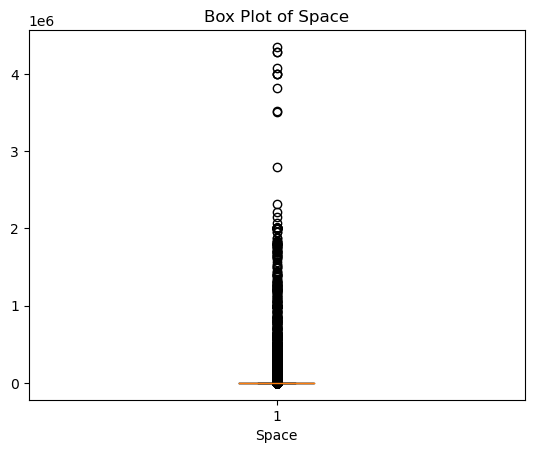

In [35]:
plt.boxplot(RealEstate_Data['Space'])
plt.xlabel('Space')
plt.title('Box Plot of Space')
plt.show()

In [99]:
agricultural_realestate =RealEstate_Data[RealEstate_Data["Property_classification"]=="زراعي"]
agricultural_realestate['Property_type'].value_counts()

شقة           8384
أرض زراعية    4507
قطعة أرض       483
إستراحة          5
بيت              3
معرض/محل         2
Name: Property_type, dtype: int64

In [100]:
Commercial_realestate =RealEstate_Data[RealEstate_Data["Property_classification"]=="تجاري"]
Commercial_realestate['Property_type'].value_counts()

قطعة أرض      18153
شقة             307
بيت              44
فيلا             32
أرض زراعية       21
مركز تجاري       21
معرض/محل         15
مرفق             12
عمارة             3
قصر               1
إستراحة           1
Name: Property_type, dtype: int64

In [101]:
residential_data = RealEstate_Data[RealEstate_Data["Property_classification"]=="سكني"]
residential_data['Property_type'].value_counts()

قطعة أرض      99750
شقة            9588
بيت             806
فيلا            193
معرض/محل        190
عمارة            54
مرفق             39
إستراحة          20
أرض زراعية       19
مركز تجاري       17
Name: Property_type, dtype: int64

In [102]:
Industrial_data = RealEstate_Data[RealEstate_Data["Property_classification"]=="صناعي"]
Industrial_data['Property_type'].value_counts()

قطعة أرض    78
Name: Property_type, dtype: int64

Region****

## **Third: Doing Operations**

In [27]:
pip install arabic_reshaper

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install python-bidi

Note: you may need to restart the kernel to use updated packages.


In [55]:
#for arabic words 
import arabic_reshaper
from bidi.algorithm import get_display
def handle_arabic(input_string):
    reshaped_text = arabic_reshaper.reshape(input_string)
    return get_display(reshaped_text)

In [62]:
#Average price for each type in each category
average_price = RealEstate_Data.loc[:,['Property_classification','Property_type','Price']]
data_avrage_price = pd.DataFrame(average_price.groupby(['Property_classification', 'Property_type'])['Price'].mean())
data_avrage_price = data_avrage_price.reset_index()
data_avrage_price


,Property_classification,Property_type,Price
0,تجاري,أرض زراعية,9.083199e+06
1,تجاري,إستراحة,1.325000e+06
2,تجاري,بيت,7.788746e+05
3,تجاري,شقة,4.756832e+05
4,تجاري,عمارة,4.725000e+06
5,تجاري,فيلا,2.374387e+06
6,تجاري,قصر,4.696720e+07
7,تجاري,قطعة أرض,2.541867e+06
8,تجاري,مرفق,2.586978e+07
9,تجاري,مركز تجاري,1.036844e+07


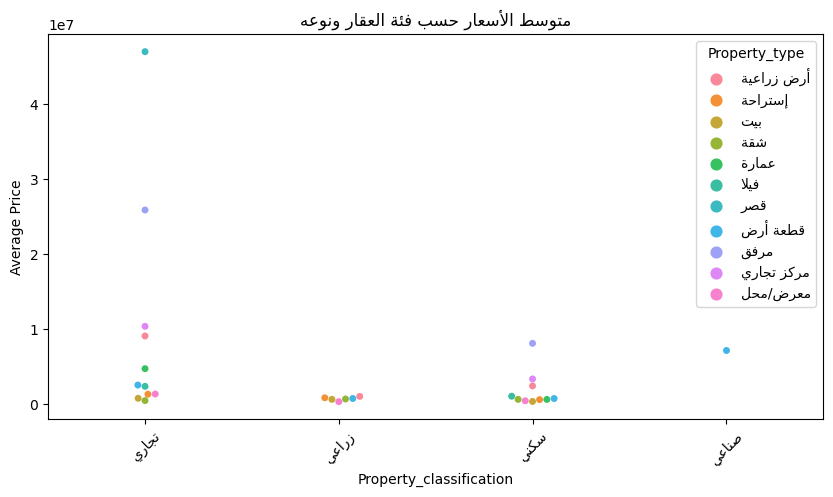

In [185]:
plt.figure(figsize=(10, 5))
sns.swarmplot(data= data_avrage_price, x=data_avrage_price['Property_classification'].apply(handle_arabic), y='Price',
              hue=data_avrage_price['Property_type'].apply(handle_arabic))
plt.title(handle_arabic('متوسط الأسعار حسب فئة العقار ونوعه'))
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

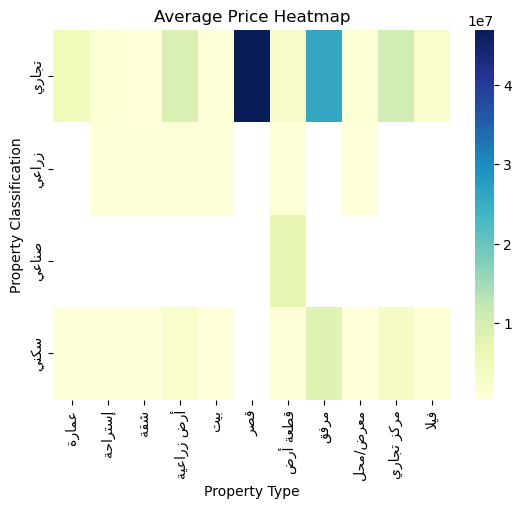

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

data_avrage_price['Property_classification'] = data_avrage_price['Property_classification'].apply(handle_arabic)
data_avrage_price['Property_type'] = data_avrage_price['Property_type'].apply(handle_arabic)

pivot_table = data_avrage_price.pivot_table(values='Price', index='Property_classification', columns='Property_type')

sns.heatmap(pivot_table, cmap='YlGnBu')

plt.title('Average Price Heatmap')
plt.xlabel('Property Type')
plt.ylabel('Property Classification')

# Show the plot
plt.show()


In [65]:
#A representation of the price increases for each category

average_prices2 = RealEstate_Data.groupby(['Property_classification', 'month_year'])['Price'].mean().reset_index()
pivot_table = average_prices2.pivot(index='month_year', columns='Property_classification', values='Price')
pivot_table
pivot_table = pivot_table.fillna(0)
pivot_table.reset_index(inplace=True)
pivot_table

Property_classification,month_year,تجاري,زراعي,سكني,صناعي
0,2022-02-01,1.939675e+06,8.038751e+05,662606.502120,7.212500e+05
1,2022-03-01,1.849617e+06,8.426284e+05,699829.112481,0.000000e+00
2,2022-04-01,2.670421e+06,8.527745e+05,688755.584155,0.000000e+00
3,2023-01-01,2.558245e+06,7.479668e+05,718848.756851,0.000000e+00
4,2023-02-01,1.853884e+06,7.150569e+05,735087.079851,2.679765e+06
5,2023-03-01,3.198365e+06,8.177508e+05,696098.098546,8.866543e+06
6,2023-04-01,2.663128e+06,1.680718e+06,756282.137169,0.000000e+00
7,2023-05-01,2.758140e+06,8.920546e+05,884776.768807,0.000000e+00
8,2023-06-01,4.357557e+06,7.888671e+05,853420.645402,0.000000e+00


In [75]:
import plotly.offline as pyo
import plotly.graph_objs as go

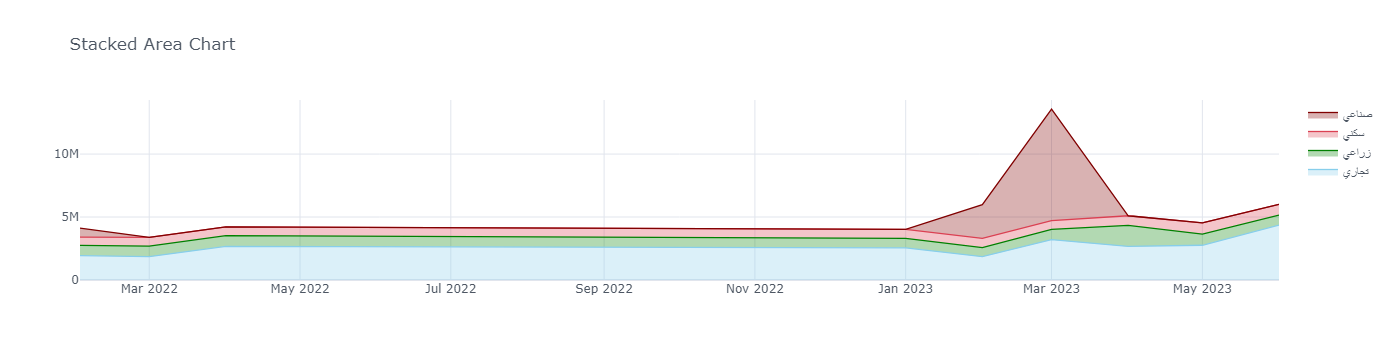

In [87]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()
pivot_table.iplot(kind='area', x='month_year', y=['تجاري', 'زراعي', 'سكني', 'صناعي'], fill=True, colors=['skyblue', 'green', 'red', 'maroon'], theme='white', title='Stacked Area Chart')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


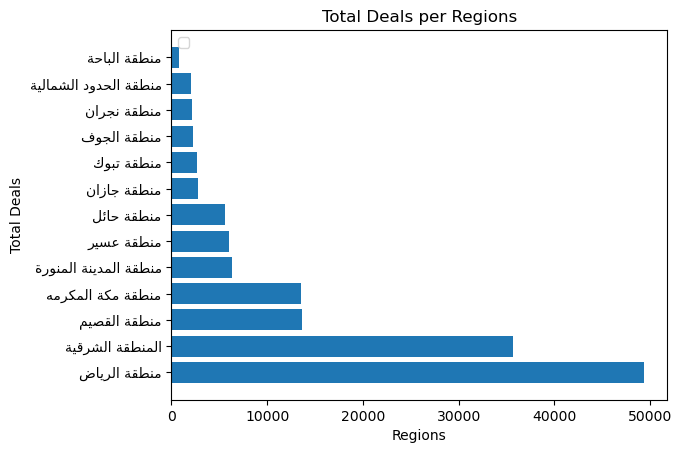

In [69]:
#Total transactions in each region

districts = RealEstate_Data.groupby('Region')
district_deals = districts['Reference_Number'].count()
district_deals = district_deals.to_frame('Deals_Count').reset_index()
district_deals

district_deals = district_deals.sort_values('Deals_Count', ascending=False)

plt.barh(district_deals['Region'].apply(handle_arabic), district_deals['Deals_Count'])
plt.xlabel('Regions')
plt.ylabel('Total Deals')
plt.title('Total Deals per Regions')
plt.legend(loc='upper left')
plt.show()


## **Analysis only in Riyad**

In [70]:
#Residential real estate

Residential_data= RealEstate_Data[RealEstate_Data["Property_classification"]=="سكني"]
Residential_data

,Reference_Number,Region,City,City/Neighborhood,Date,Property_classification,Property_type,Number_of_properties,Price,Space,Price_per_square-meter,month_year
0,18923186,منطقة الرياض,الافلاج,أخرى,2023-01-01,سكني,قطعة أرض,1,32000.0,630.00,50.7936,2023-01-01
1,18920819,منطقة الرياض,الافلاج,الريان,2023-01-01,سكني,قطعة أرض,1,60000.0,690.00,86.9565,2023-01-01
2,18923523,منطقة الرياض,الخرج,827 حى هجرة الصاع,2023-01-01,سكني,قطعة أرض,1,20000.0,630.00,31.7460,2023-01-01
3,18909006,منطقة الرياض,الخرج,الاندلس,2023-01-01,سكني,قطعة أرض,1,140000.0,333.00,420.4204,2023-01-01
4,18857540,منطقة الرياض,الخرج,الخالديه,2023-01-01,سكني,قطعة أرض,1,50000.0,380.00,131.5789,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
142740,16723883,منطقة الجوف,سكاكا,ج26,2022-04-14,سكني,قطعة أرض,1,50000.0,800.00,62.5000,2022-04-01
142742,16724005,منطقة الجوف,سكاكا,شمال سكاكا,2022-04-14,سكني,قطعة أرض,1,20000.0,892.79,22.4016,2022-04-01
142743,16723273,منطقة الجوف,سكاكا,هديب الجنوبى,2022-04-14,سكني,قطعة أرض,1,20000.0,600.00,33.3333,2022-04-01
142744,16730845,منطقة الجوف,طبرجل,23/ 7/ 2/ 1431/ س,2022-04-14,سكني,قطعة أرض,1,50000.0,471.85,105.9658,2022-04-01


In [71]:
#Residential real estate in Riyadh
riyadh_data = Residential_data.loc[Residential_data['City'] == 'الرياض']
riyadh_data['Reference_Number'].duplicated().value_counts()

False    25688
Name: Reference_Number, dtype: int64

In [72]:
riyadh_data

,Reference_Number,Region,City,City/Neighborhood,Date,Property_classification,Property_type,Number_of_properties,Price,Space,Price_per_square-meter,month_year
56,18916574,منطقة الرياض,الرياض,اشبيليا,2023-01-01,سكني,قطعة أرض,1,1150000.0,450.00,2555.5555,2023-01-01
57,18917832,منطقة الرياض,الرياض,اشبيليا,2023-01-01,سكني,قطعة أرض,1,136117.0,450.00,302.4822,2023-01-01
58,18923510,منطقة الرياض,الرياض,اشبيليا,2023-01-01,سكني,شقة,1,350000.0,166.67,2099.9580,2023-01-01
59,18921934,منطقة الرياض,الرياض,البيان,2023-01-01,سكني,قطعة أرض,1,922500.0,450.00,2050.0000,2023-01-01
60,18907617,منطقة الرياض,الرياض,الحمراء,2023-01-01,سكني,قطعة أرض,1,1428600.0,450.00,3174.6666,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
142283,16732007,منطقة الرياض,الرياض,لبن,2022-04-14,سكني,شقة,1,475000.0,140.62,3377.8978,2022-04-01
142285,16726892,منطقة الرياض,الرياض,نمار,2022-04-14,سكني,قطعة أرض,1,450000.0,450.00,1000.0000,2022-04-01
142286,16727995,منطقة الرياض,الرياض,نمار,2022-04-14,سكني,قطعة أرض,1,490000.0,468.00,1047.0085,2022-04-01
142287,16726578,منطقة الرياض,الرياض,نمار,2022-04-14,سكني,قطعة أرض,1,260000.0,230.55,1127.7380,2022-04-01


In [73]:
average_prices_ryiadh = riyadh_data.groupby(['Property_classification', 'month_year'])['Price'].mean().reset_index()
pivot_table2 = average_prices_ryiadh.pivot(index='month_year', columns='Property_classification', values='Price')
pivot_table2.reset_index(inplace=True)
pivot_table2

Property_classification,month_year,سكني
0,2022-02-01,1.035871e+06
1,2022-03-01,1.167025e+06
2,2022-04-01,1.249690e+06
3,2023-01-01,1.338671e+06
4,2023-02-01,1.168962e+06
5,2023-03-01,1.391089e+06
6,2023-04-01,1.355741e+06
7,2023-05-01,2.007074e+06
8,2023-06-01,1.498307e+06


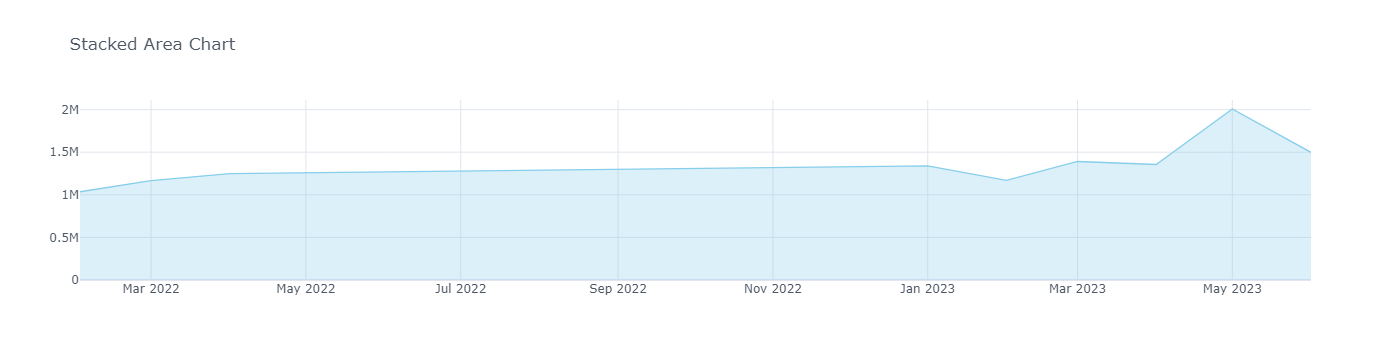

In [76]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()
pivot_table2.iplot(kind='area', x='month_year', y=['سكني'], fill=True, colors=['skyblue'], theme='white', title='Stacked Area Chart')

In [77]:
#Neighborhoods with the highest number of transactions over the two years

neighborhood_transactions = riyadh_data.groupby('City/Neighborhood')['Reference_Number'].count().reset_index()

sorted_neighborhoods = neighborhood_transactions.sort_values('Reference_Number', ascending=False)
top_neighborhoods = sorted_neighborhoods.head(5)

top_neighborhoods

,City/Neighborhood,Reference_Number
35,الخير,3283
170,شرق الرياض,2314
189,نمار,1928
179,عريض,1916
133,النرجس,1089


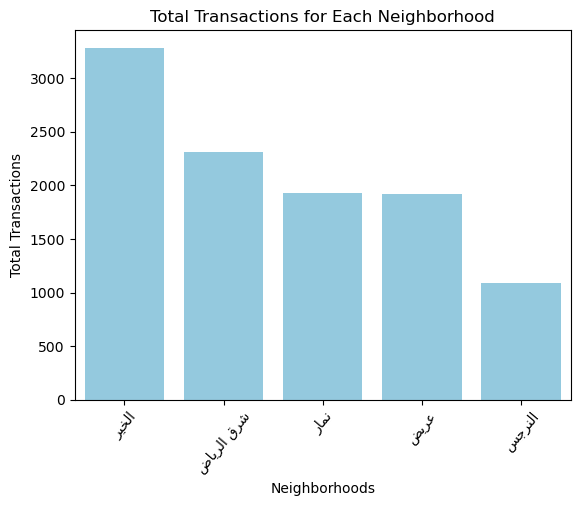

In [78]:
sns.barplot(x=top_neighborhoods['City/Neighborhood'].apply(handle_arabic), y= top_neighborhoods['Reference_Number'], color='skyblue')
plt.xlabel('Neighborhoods')
plt.ylabel('Total Transactions')
plt.title('Total Transactions for Each Neighborhood')
plt.xticks(rotation=50)
plt.show()

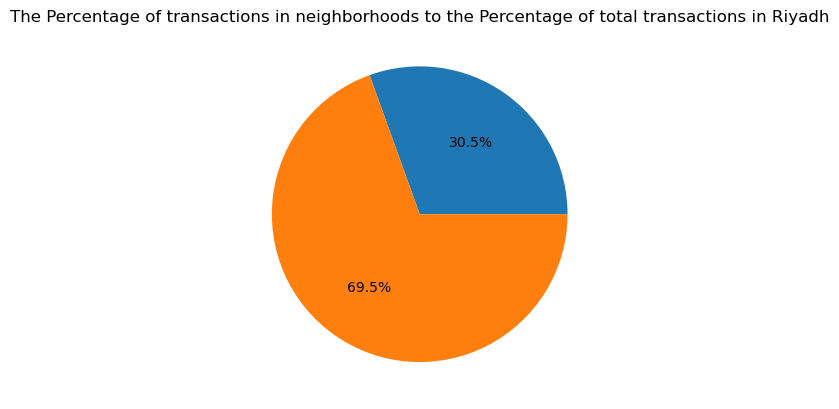

In [193]:
#Percentage of residential top_neighborhood deals over the total number of residential deals in Riyadh

Total_Reference_Number = riyadh_data['Reference_Number'].count() #25688
Total_Reference_Number

top_neighborhoods['Percentage'] = (top_neighborhoods['Reference_Number'] / Total_Reference_Number) * 100
top_neighborhoods

total_precent = top_neighborhoods['Percentage'].sum() #40%
total_precent

total = RealEstate_Data['Reference_Number'].count() #142748
total

Total_Reference_Number_prec = (Total_Reference_Number/total)*100
Total_Reference_Number_prec

plt.pie([Total_Reference_Number_prec, total_precent], autopct='%1.1f%%')
plt.title('The Percentage of transactions in neighborhoods to the Percentage of total transactions in Riyadh')
plt.show()

In [194]:
average_price_per_sqm = riyadh_data.groupby(['Property_type','month_year'])['Price_per_square-meter'].mean()

average_price_per_sqm = pd.DataFrame(average_price_per_sqm)
average_price_per_sqm = average_price_per_sqm.reset_index()
average_price_per_sqm.rename(columns={0: 'average_price_per_sqm'}, inplace=True)

average_price_per_sqm

,Property_type,month_year,Price_per_square-meter
0,إستراحة,2023-02-01,2200.000000
1,بيت,2022-02-01,2191.119962
2,بيت,2022-03-01,1729.500231
3,بيت,2022-04-01,1738.593525
4,بيت,2023-01-01,2437.802350
5,بيت,2023-02-01,9718.818247
6,بيت,2023-03-01,1947.673144
7,بيت,2023-04-01,2498.240896
8,بيت,2023-05-01,2134.798633
9,بيت,2023-06-01,2087.629735


In [118]:

pivot_table3 = average_price_per_sqm.pivot(index='month_year', columns='Property_type', values='Price_per_square-meter')
pivot_table3.reset_index(inplace=True)
pivot_table3 = pivot_table3.fillna(0)
pivot_table3

Property_type,month_year,إستراحة,بيت,شقة,عمارة,فيلا,قطعة أرض,مرفق,معرض/محل
0,2022-02-01,0.0,2191.119962,3270.611754,0.000000,4066.290250,1787.252718,0.000000,11308.425567
1,2022-03-01,0.0,1729.500231,2985.821386,3340.292200,2215.595012,2058.417878,2115.384600,26072.398644
2,2022-04-01,0.0,1738.593525,3625.947242,0.000000,0.000000,2014.953914,3538.846700,6917.726778
3,2023-01-01,0.0,2437.802350,3429.489373,2343.010250,2419.741000,2417.203690,0.000000,8875.621800
4,2023-02-01,2200.0,9718.818247,3801.334133,11506.625150,2792.377475,2398.439142,165.735000,21666.666600
5,2023-03-01,0.0,1947.673144,3605.109728,3546.944100,2719.948386,2616.641079,3040.154600,9707.410539
6,2023-04-01,0.0,2498.240896,7108.837054,2946.769359,2776.400367,2546.685769,1700.000000,16225.253502
7,2023-05-01,0.0,2134.798633,6402.173767,2672.861089,2622.930484,2179.122147,3333.945244,17804.996024
8,2023-06-01,0.0,2087.629735,6904.450972,2093.843901,887.922078,2353.254733,1127.087199,21345.020316


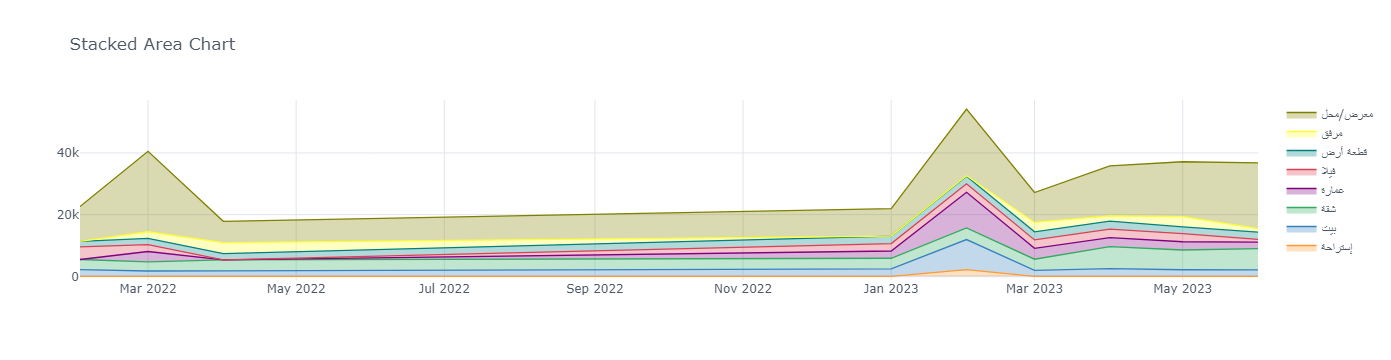

In [119]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()
pivot_table3.iplot(kind='area', x='month_year', y=['إستراحة','بيت','شقة','عمارة','فيلا','قطعة أرض','مرفق','معرض/محل'], fill=True, theme='white', title='Stacked Area Chart')

In [151]:
riyadh_data

,Reference_Number,Region,City,City/Neighborhood,Date,Property_classification,Property_type,Number_of_properties,Price,Space,Price_per_square-meter,month_year
56,18916574,منطقة الرياض,الرياض,اشبيليا,2023-01-01,سكني,قطعة أرض,1,1150000.0,450.00,2555.5555,2023-01-01
57,18917832,منطقة الرياض,الرياض,اشبيليا,2023-01-01,سكني,قطعة أرض,1,136117.0,450.00,302.4822,2023-01-01
58,18923510,منطقة الرياض,الرياض,اشبيليا,2023-01-01,سكني,شقة,1,350000.0,166.67,2099.9580,2023-01-01
59,18921934,منطقة الرياض,الرياض,البيان,2023-01-01,سكني,قطعة أرض,1,922500.0,450.00,2050.0000,2023-01-01
60,18907617,منطقة الرياض,الرياض,الحمراء,2023-01-01,سكني,قطعة أرض,1,1428600.0,450.00,3174.6666,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
142283,16732007,منطقة الرياض,الرياض,لبن,2022-04-14,سكني,شقة,1,475000.0,140.62,3377.8978,2022-04-01
142285,16726892,منطقة الرياض,الرياض,نمار,2022-04-14,سكني,قطعة أرض,1,450000.0,450.00,1000.0000,2022-04-01
142286,16727995,منطقة الرياض,الرياض,نمار,2022-04-14,سكني,قطعة أرض,1,490000.0,468.00,1047.0085,2022-04-01
142287,16726578,منطقة الرياض,الرياض,نمار,2022-04-14,سكني,قطعة أرض,1,260000.0,230.55,1127.7380,2022-04-01


C:\Users\Rahaf\AppData\Local\Temp\ipykernel_18852\3864456721.py:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0, 0.5, 'Average Price')

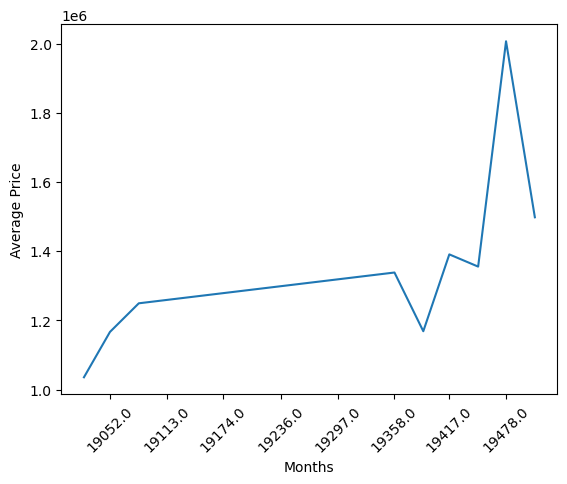

In [159]:
df_avg = riyadh_data.groupby(riyadh_data["month_year"].dt.monthzz_name(), as_index=True)['Price'].mean()
df_avg
fig = sns.lineplot(x = df_avg.index, y = df_avg , palette='pastel' )
# fig.set_title("Average price in Riyadh neighborhoods over Monthes ")
fig.set_xlabel("Months")
fig.set_ylabel("Average Price")